# Group Project: Mapping Extraction: The Spatial Relationship Between Jails and Data Centers In Los Angeles
### Leila Ullmann
## In this notebook, I will look at arrest data in Los Angeles to identify arrests taking place in so-called Million Dollar Hoods

In [30]:
# for data wrangling
import pandas as pd

# for interactive plots
import plotly.express as px

# to import open data
from sodapy import Socrata

In [31]:
# connect to the data portal
client = Socrata("data.lacity.org", None)

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("amvf-fr72", limit=2000)

# Convert to pandas DataFrame
arrests = pd.DataFrame.from_records(results)

# print it with .sample, which gives you random rows
arrests.sample(2)

,rpt_id,report_type,arst_date,time,area,area_desc,rd,age,sex_cd,descent_cd,...,bkg_time,bkg_location,bkg_loc_cd,:@computed_region_qz3q_ghft,:@computed_region_k96s_3jcv,:@computed_region_tatf_ua23,:@computed_region_ur2y_g4cx,:@computed_region_kqwf_mjcx,:@computed_region_2dna_qi2s,crsst
100,231413625,RFC,2023-07-07T00:00:00.000,1430,14,Pacific,1412,37,M,W,...,NaN,NaN,NaN,25073,908,970,10,10,30,OCEAN FRONT WK
1703,6676514,BOOKING,2023-09-12T00:00:00.000,1150,06,Hollywood,0668,24,F,H,...,1349,HOLLYWOOD,4206,23669,425,517,NaN,8,57,NaN


In [33]:
arrests.sample(10)

,rpt_id,report_type,arst_date,time,area,area_desc,rd,age,sex_cd,descent_cd,...,bkg_time,bkg_location,bkg_loc_cd,:@computed_region_qz3q_ghft,:@computed_region_k96s_3jcv,:@computed_region_tatf_ua23,:@computed_region_ur2y_g4cx,:@computed_region_kqwf_mjcx,:@computed_region_2dna_qi2s,crsst
907,231712682,RFC,2023-07-12T00:00:00.000,1515,17,Devonshire,1747,40,F,H,...,NaN,NaN,NaN,19329,85,324,NaN,2,79,NaN
642,230214161,RFC,2023-07-06T00:00:00.000,1300,02,Rampart,0246,46,M,W,...,NaN,NaN,NaN,24352,559,836,NaN,11,63,ALVARADO
198,6637529,BOOKING,2023-07-07T00:00:00.000,1615,06,Hollywood,0644,38,M,W,...,2126,HOLLYWOOD,4206,23677,410,1237,NaN,7,82,NaN
300,6628341,BOOKING,2023-06-22T00:00:00.000,1255,18,Southeast,1829,16,F,B,...,1552,77TH ST,4212,22351,1633,98,21,NaN,NaN,NaN
1773,6710134,BOOKING,2023-11-10T00:00:00.000,2350,14,Pacific,1431,38,F,O,...,0133,PACIFIC,4214,25073,909,1263,10,10,30,NaN
55,6634773,BOOKING,2023-07-03T00:00:00.000,1055,09,Van Nuys,0935,30,M,H,...,1057,VALLEY - JAIL DIV,4279,19729,237,1338,NaN,3,18,NaN
1366,6697999,BOOKING,2023-10-21T00:00:00.000,1746,07,Wilshire,0701,43,M,W,...,1954,METRO - JAIL DIVISION,4273,23677,460,802,NaN,6,26,NaN
643,6612100,BOOKING,2023-05-26T00:00:00.000,1400,03,Southwest,0395,68,M,B,...,1748,77TH ST,4212,24027,732,1023,7,14,35,HALLDALE AV
1647,6609959,BOOKING,2023-05-23T00:00:00.000,1305,20,Olympic,2038,23,M,H,...,1753,METRO - JAIL DIVISION,4273,22722,600,684,NaN,12,63,VERMONT
839,231414101,RFC,2023-07-14T00:00:00.000,1055,14,Pacific,1495,40,M,B,...,NaN,NaN,NaN,23676,2340,445,12,10,16,NaN


In [34]:
## Look to see the area descriptions of the arrests
arrests_locations = arrests.value_counts(['area_desc']).reset_index(name="count")
arrests_locations

,area_desc,count
0,Central,162
1,Rampart,161
2,Hollywood,133
3,Pacific,127
4,77th Street,120
5,Southwest,120
6,Mission,108
7,Olympic,105
8,Newton,95
9,Van Nuys,93


### According to the data description, these area descriptions designate LAPD's 21 Community Police Stations. The following are the stations positioned in our focus area of the million dollar hoods: South Central Los Angeles and Downtown.
- Central
- 77th Street
- Southwest
- Newton
- Southeast

### We will be looking at arrest data from these following areas, over the course of three months from 2023.

In [35]:
# add a "where" statement
results = client.get("amvf-fr72", 
                     limit = 15000, # putting an arbitrary high number (otherwise defaults to 1000)
                     where = "arst_date between '2023-1-01T00:00:00' and '2023-4-01T00:00:00'"
                    )

In [36]:
# add a "where" statement-- this ended up not being a successful data query.
results_central = client.get("amvf-fr72", 
                     limit = 5000, # putting an arbitrary high number (otherwise defaults to 1000)
                     where = "area_desc = 'Central'"
                    )
results_77th = client.get("amvf-fr72", 
                     limit = 5000, # putting an arbitrary high number (otherwise defaults to 1000)
                     where = "area_desc = '77th Street'"
                    )
results_Southwest = client.get("amvf-fr72", 
                     limit = 5000, # putting an arbitrary high number (otherwise defaults to 1000)
                     where = "area_desc = 'Southwest'"
                    )
results_Newton = client.get("amvf-fr72", 
                     limit = 5000, # putting an arbitrary high number (otherwise defaults to 1000)
                     where = "area_desc = 'Newton'"
                    )
results_Southeast = client.get("amvf-fr72", 
                     limit = 5000, # putting an arbitrary high number (otherwise defaults to 1000)
                     where = "area_desc = 'Southeast'"
                    )

In [37]:
# Convert to pandas DataFrame
arrests= pd.DataFrame.from_records(results)
arrests_Central= pd.DataFrame.from_records(results_central)
arrests_77th= pd.DataFrame.from_records(results_77th)
arrests_Southwest= pd.DataFrame.from_records(results_Southwest)
arrests_Newton= pd.DataFrame.from_records(results_Newton)
arrests_Southeast= pd.DataFrame.from_records(results_Southeast)

In [38]:
# how many rows and columns?
arrests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14277 entries, 0 to 14276
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   rpt_id           14277 non-null  object
 1   report_type      14277 non-null  object
 2   arst_date        14277 non-null  object
 3   time             14276 non-null  object
 4   area             14277 non-null  object
 5   area_desc        14277 non-null  object
 6   rd               14277 non-null  object
 7   age              14277 non-null  object
 8   sex_cd           14277 non-null  object
 9   descent_cd       14277 non-null  object
 10  chrg_grp_cd      13349 non-null  object
 11  grp_description  13346 non-null  object
 12  arst_typ_cd      14277 non-null  object
 13  charge           14277 non-null  object
 14  chrg_desc        13349 non-null  object
 15  dispo_desc       13142 non-null  object
 16  location         14277 non-null  object
 17  crsst            5769 non-null 

In [39]:
# what fields and datatypes?
arrests.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14277 entries, 0 to 14276
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   rpt_id           14277 non-null  object
 1   report_type      14277 non-null  object
 2   arst_date        14277 non-null  object
 3   time             14276 non-null  object
 4   area             14277 non-null  object
 5   area_desc        14277 non-null  object
 6   rd               14277 non-null  object
 7   age              14277 non-null  object
 8   sex_cd           14277 non-null  object
 9   descent_cd       14277 non-null  object
 10  chrg_grp_cd      13349 non-null  object
 11  grp_description  13346 non-null  object
 12  arst_typ_cd      14277 non-null  object
 13  charge           14277 non-null  object
 14  chrg_desc        13349 non-null  object
 15  dispo_desc       13142 non-null  object
 16  location         14277 non-null  object
 17  crsst            5769 non-null 

In [40]:
# what are the first 5 rows?
arrests.head(5)

,rpt_id,report_type,arst_date,time,area,area_desc,rd,age,sex_cd,descent_cd,...,dispo_desc,location,crsst,lat,lon,location_1,bkg_date,bkg_time,bkg_location,bkg_loc_cd
0,6528046,BOOKING,2023-01-01T00:00:00.000,0015,13,Newton,1317,39,M,H,...,DISTRICT ATTORNEY REJECT,20TH,ALAMEDA,34.018,-118.2397,"{'type': 'Point', 'coordinates': [-118.2397, 3...",2023-01-01T00:00:00.000,0147,77TH ST,4212
1,6528349,BOOKING,2023-01-01T00:00:00.000,2115,01,Central,0161,20,M,H,...,CITY ATTORNEY REJECT,11TH ST,HOPE ST,34.0483,-118.2631,"{'type': 'Point', 'coordinates': [-118.2631, 3...",2023-01-02T00:00:00.000,0034,METRO - JAIL DIVISION,4273
2,6528200,BOOKING,2023-01-01T00:00:00.000,1230,14,Pacific,1494,43,M,O,...,FELONY COMPLAINT FILED,400 WORLD WAY,NaN,33.9455,-118.4,"{'type': 'Point', 'coordinates': [-118.4, 33.9...",2023-01-01T00:00:00.000,1401,PACIFIC,4214
3,6528107,BOOKING,2023-01-01T00:00:00.000,0100,15,N Hollywood,1562,36,M,O,...,FELONY COMPLAINT FILED,12400 MOORPARK ST,NaN,34.1533,-118.4058,"{'type': 'Point', 'coordinates': [-118.4058, 3...",2023-01-01T00:00:00.000,0722,METRO - JAIL DIVISION,4273
4,6528091,BOOKING,2023-01-01T00:00:00.000,0355,06,Hollywood,0646,21,F,W,...,CITY ATTORNEY REJECT,SUNSET BL,CAHUENGA BL,34.098,-118.3295,"{'type': 'Point', 'coordinates': [-118.3295, 3...",2023-01-01T00:00:00.000,0443,HOLLYWOOD,4206


## Make a plot with the arrests in each location

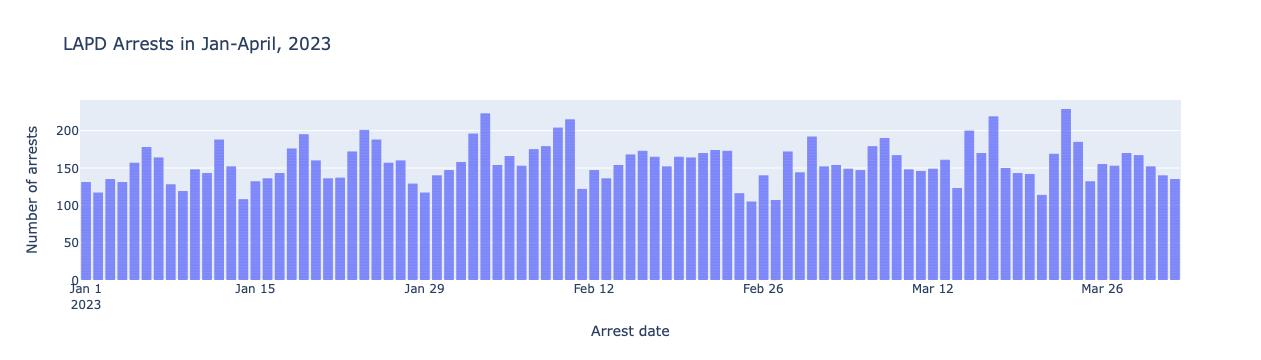

In [41]:
# add labels by providing a dict
fig = px.bar(
        arrests,
        x='arst_date',
        title='LAPD Arrests in Jan-April, 2023',
        labels={
            'arst_date':'Arrest date',
            'count':'Number of arrests'
        }
)

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

In [42]:
# here is where we look at distinct locations
arrest_by_location = arrests.value_counts('area_desc').reset_index(name='count')
arrest_by_location

,area_desc,count
0,Central,1074
1,Rampart,1074
2,77th Street,960
3,Newton,856
4,Van Nuys,839
5,Hollywood,793
6,Mission,767
7,Southwest,757
8,Olympic,702
9,Southeast,679


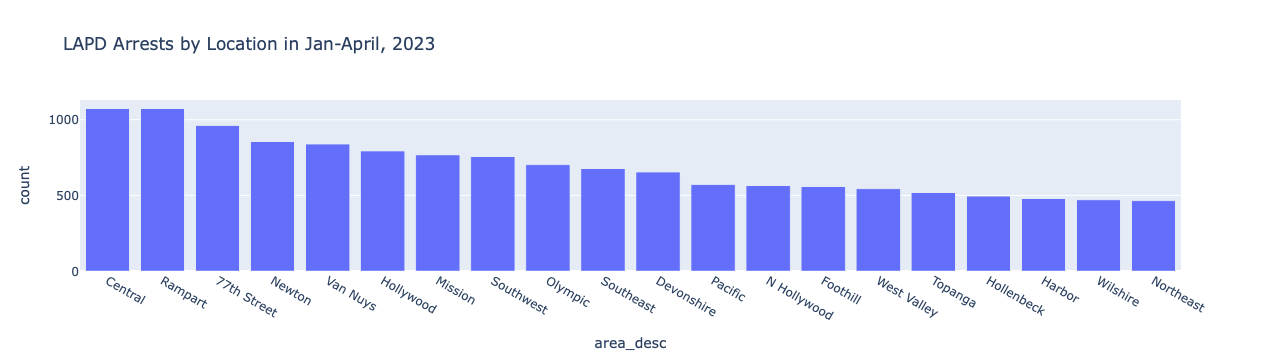

In [43]:
# plot the top 10 locations
fig = px.bar(arrest_by_location.head(20),
       x='area_desc',
       y='count',
       title='LAPD Arrests by Location in Jan-April, 2023')

fig.show()

### This figure shows that three of the 5 target areas are in the highest arrest locations.

In [44]:
arrests_grouped = arrests.value_counts(['arst_date','area_desc']).reset_index(name='count')
arrests_grouped

,arst_date,area_desc,count
0,2023-03-23T00:00:00.000,Newton,48
1,2023-03-26T00:00:00.000,Devonshire,44
2,2023-02-10T00:00:00.000,77th Street,33
3,2023-02-20T00:00:00.000,Rampart,31
4,2023-03-15T00:00:00.000,Foothill,30
...,...,...,...
1892,2023-01-29T00:00:00.000,Topanga,1
1893,2023-01-29T00:00:00.000,Wilshire,1
1894,2023-01-31T00:00:00.000,Foothill,1
1895,2023-03-01T00:00:00.000,West LA,1


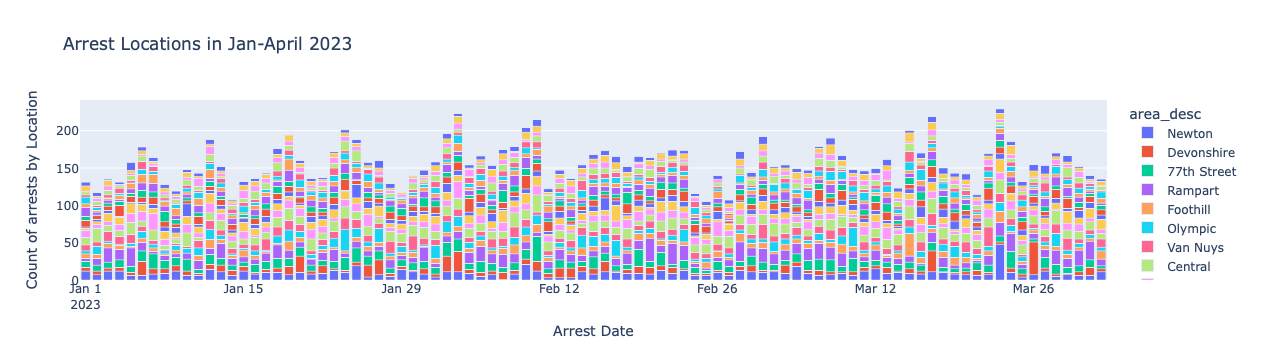

In [45]:
# make a stacked bar chart
fig = px.bar(arrests_grouped,
       x='arst_date',
       y='count',
       color= 'area_desc', # this creates the "stack"
             labels={"arst_date": "Arrest Date",
                     "count": "Count of arrests by Location",
                     "grp_description": "Arrest Location"
                     },
    title="Arrest Locations in Jan-April 2023"
)

fig.show()

## Subsetting the Data

In [46]:
arrests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14277 entries, 0 to 14276
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   rpt_id           14277 non-null  object
 1   report_type      14277 non-null  object
 2   arst_date        14277 non-null  object
 3   time             14276 non-null  object
 4   area             14277 non-null  object
 5   area_desc        14277 non-null  object
 6   rd               14277 non-null  object
 7   age              14277 non-null  object
 8   sex_cd           14277 non-null  object
 9   descent_cd       14277 non-null  object
 10  chrg_grp_cd      13349 non-null  object
 11  grp_description  13346 non-null  object
 12  arst_typ_cd      14277 non-null  object
 13  charge           14277 non-null  object
 14  chrg_desc        13349 non-null  object
 15  dispo_desc       13142 non-null  object
 16  location         14277 non-null  object
 17  crsst            5769 non-null 

In [47]:
# subset the data below (don't forget to add .copy at the end)
arrests_mini = arrests[['arst_date','age','descent_cd','area_desc','lat','lon']].copy()

In [48]:
# convert lat/lon's to floats
arrests_mini['lat'] = arrests_mini['lat'].astype(float)
arrests_mini['lon'] = arrests_mini['lon'].astype(float)
arrests_mini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14277 entries, 0 to 14276
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   arst_date   14277 non-null  object 
 1   age         14277 non-null  object 
 2   descent_cd  14277 non-null  object 
 3   area_desc   14277 non-null  object 
 4   lat         14277 non-null  float64
 5   lon         14277 non-null  float64
dtypes: float64(2), object(4)
memory usage: 669.4+ KB


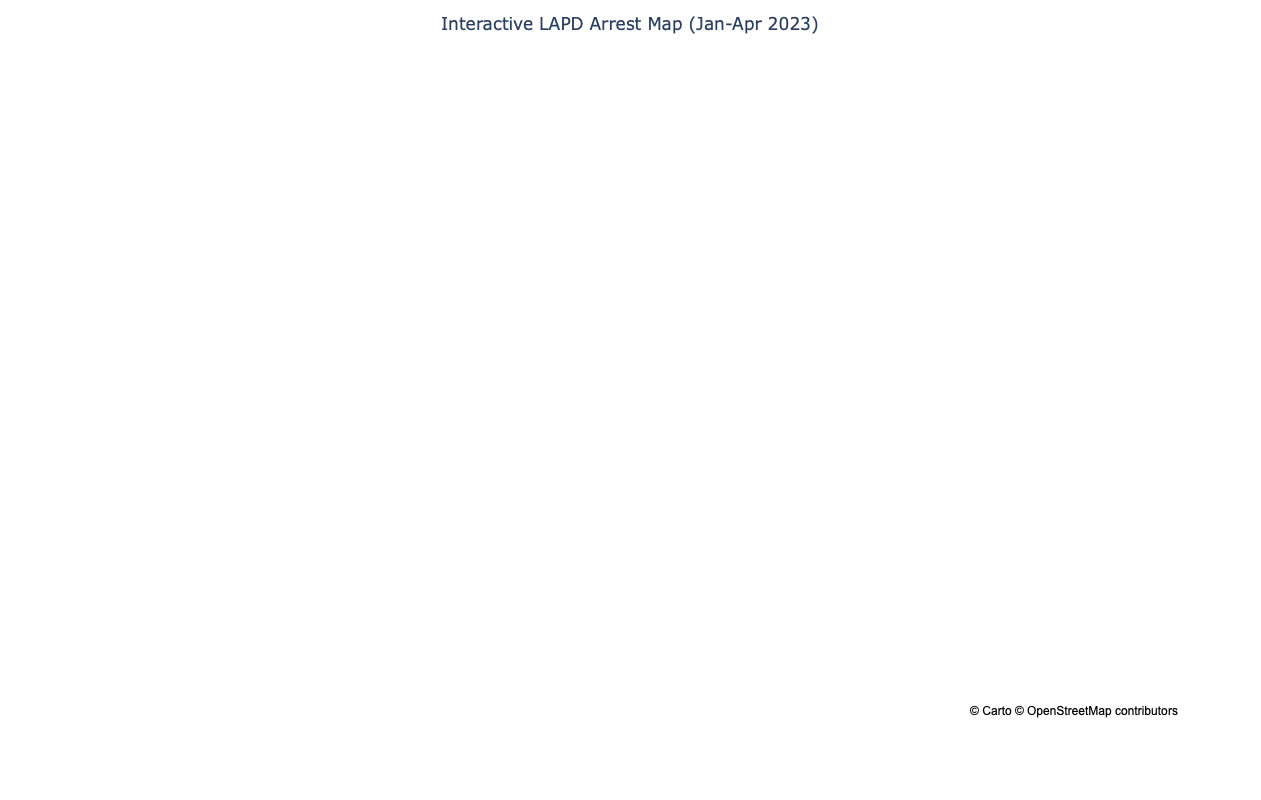

In [49]:
fig = px.scatter_mapbox(arrests_mini,
                        lat='lat',
                        lon='lon',
                        mapbox_style="carto-positron")

# options on the layout
fig.update_layout(
    width = 800,
    height = 800,
    title = "Interactive LAPD Arrest Map (Jan-Apr 2023)",
    title_x=0.5 # aligns title to center
)

fig.show()

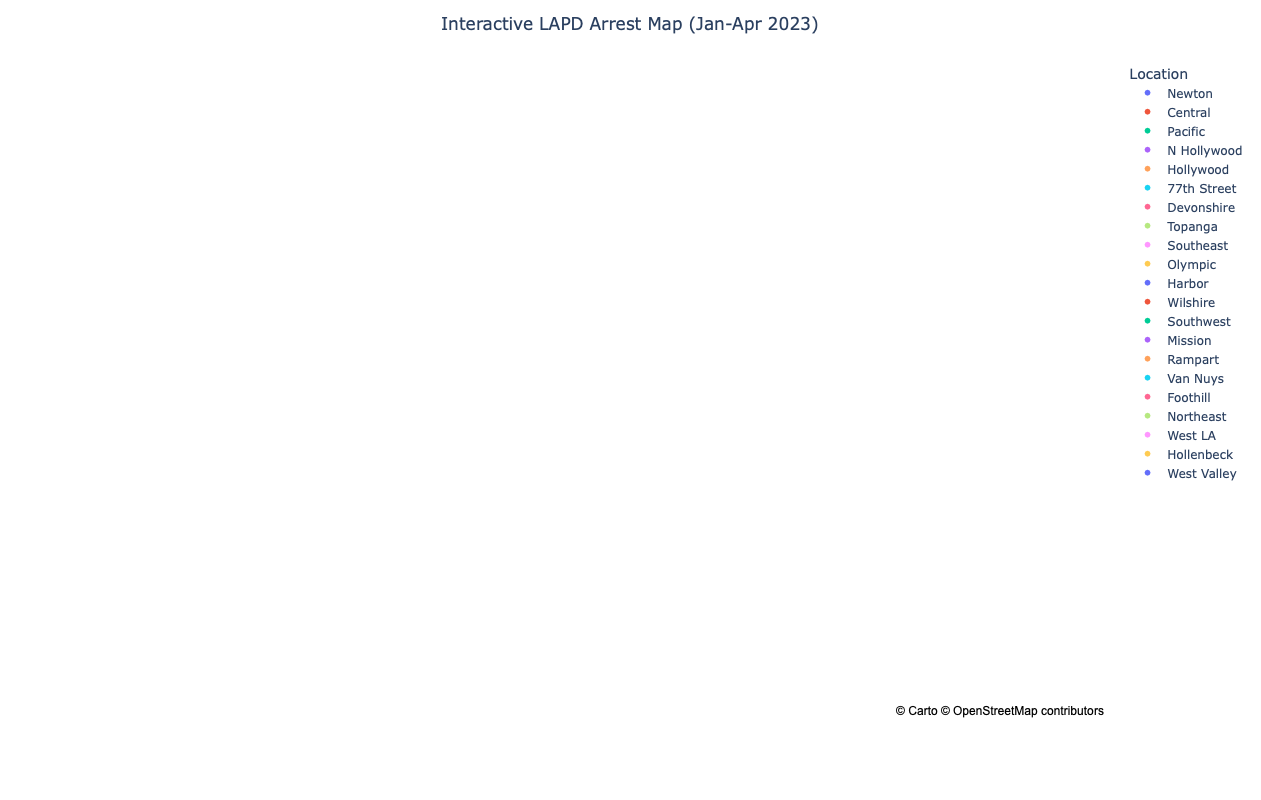

In [65]:
fig = px.scatter_mapbox(arrests_mini, 
                        lat="lat", 
                        lon="lon", 
                        color="area_desc",
                        labels={'area_desc':'Location'},
                        mapbox_style="carto-positron"
                       )

# options on the layout
fig.update_layout(
    width = 800,
    height = 800,
    title = "Interactive LAPD Arrest Map (Jan-Apr 2023)",
    title_x=0.5 # aligns title to center
)


fig.show()
fig.write_html(f"arrests_map_la.html")

In [56]:
def location_map(location='Hollenbeck'):
    
    fig = px.scatter_mapbox(
                            arrests_mini[arrests_mini.area_desc==location], 
                            lat="lat", 
                            lon="lon", 
                            color="area_desc",
                            labels={'area_desc':'Location'},
                            mapbox_style="carto-positron"
    )

    # options on the layout
    fig.update_layout(
        width = 600,
        height = 600,
        title = "Interactive LAPD Arrest Map (Jan-Apr 2023)<br>Showing where descent label is "+location,
        title_x=0.5 # aligns title to center
    )

    fig.show()
    fig.write_html(f"arrests_map_{location}.html")

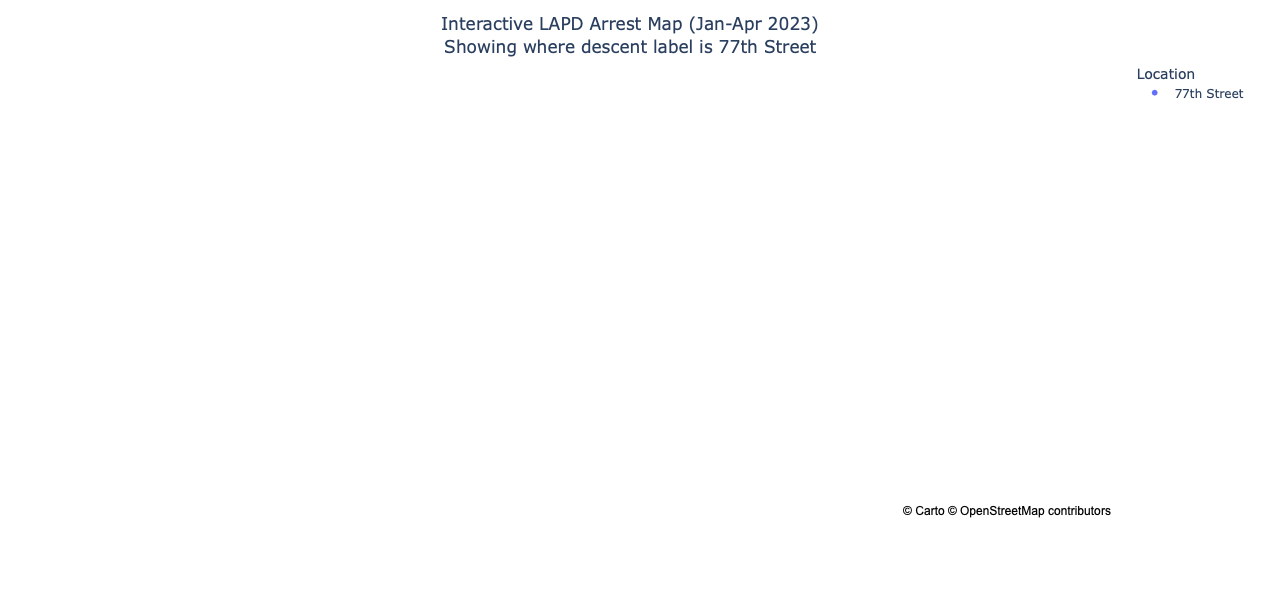

In [57]:
# call the function (try other values)
location_map(location='77th Street')

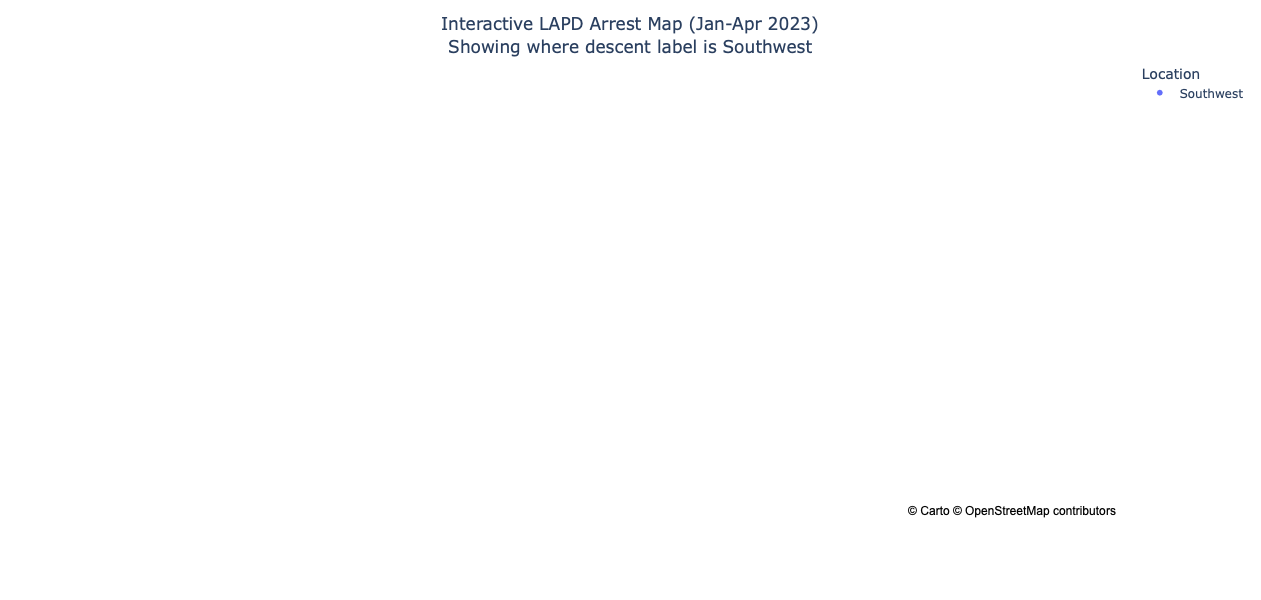

In [59]:
# call the function (try other values)
location_map(location='Southwest')

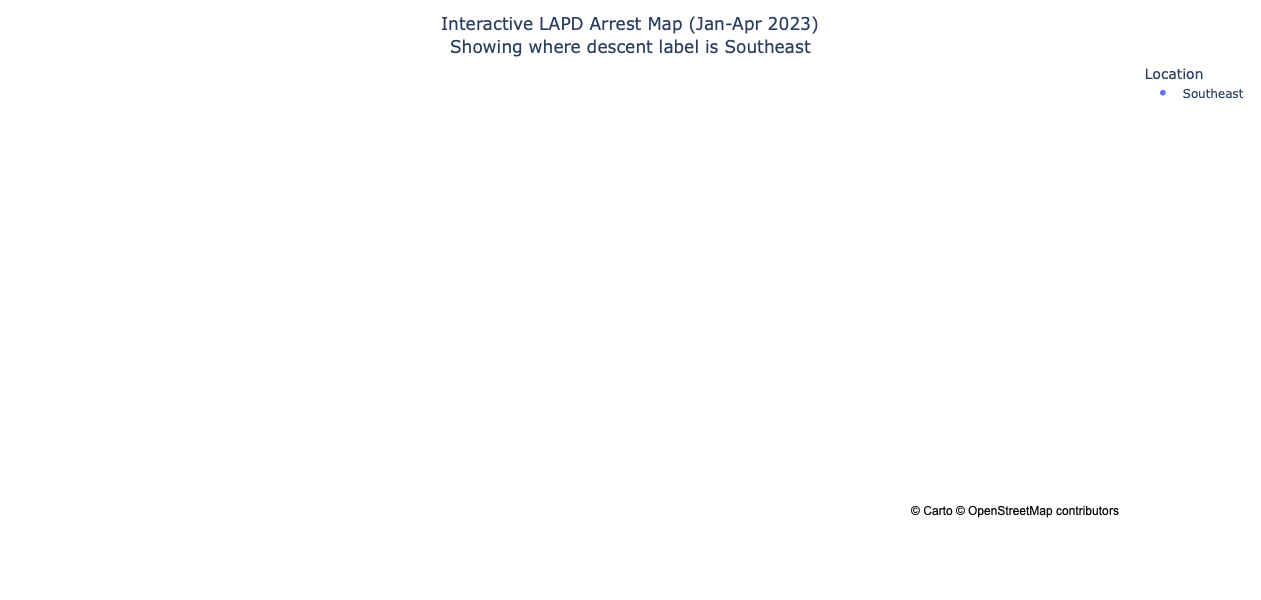

In [60]:
location_map(location='Southeast')

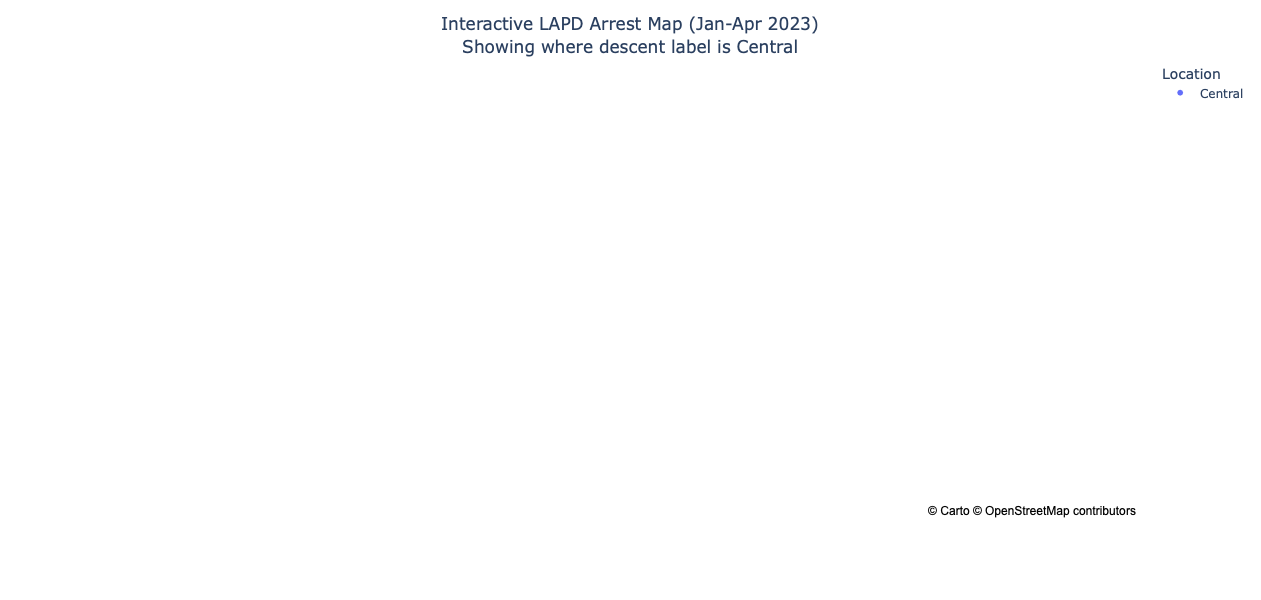

In [63]:
location_map(location='Central')